In [ ]:
import numpy as np
import pandas as pd
import random
from EMDPM.model_generator import generate_logistic_model
from EMDPM.synthetic_data_generator import generate_synthetic_data
from EMDPM.visualization import (
    plot_biomarker_trajectories,
    plot_true_observations,
    plot_initial_beta_guess,
    plot_theta_fit_comparison,
    plot_theta_error_history,
    plot_beta_overlay,
    plot_beta_error_history,
    plot_lse
)
from EMDPM.utils import solve_system
from EMDPM.em_transformer import EM


true x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true f: [0.         0.         0.         0.         0.0122567  0.
 0.         0.01076131 0.         0.01383921]


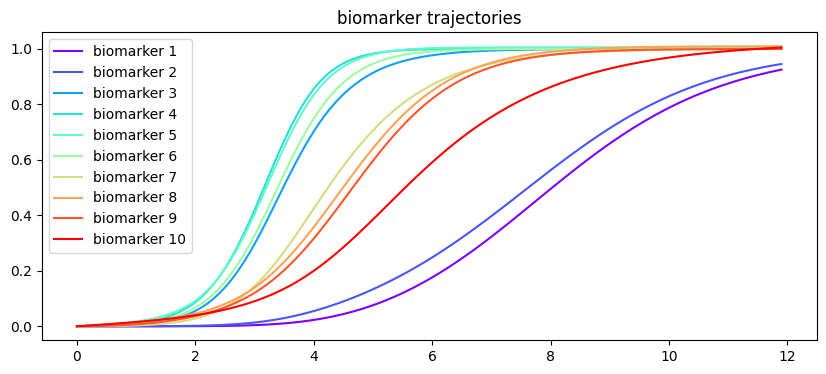

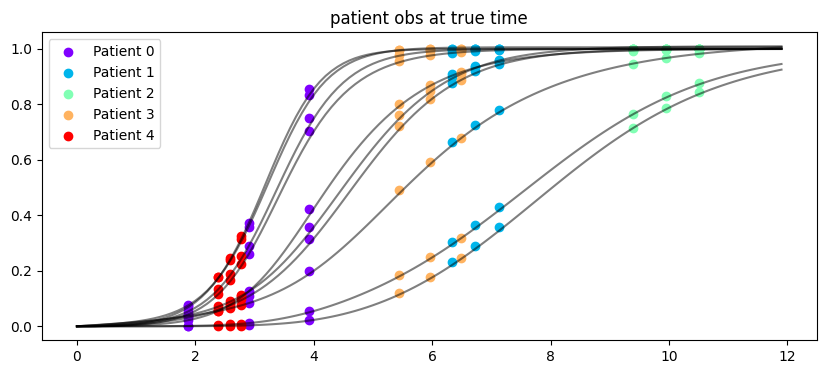

 35%|███▌      | 7/20 [00:19<00:34,  2.67s/it]

100%|██████████| 20/20 [01:50<00:00,  5.54s/it]


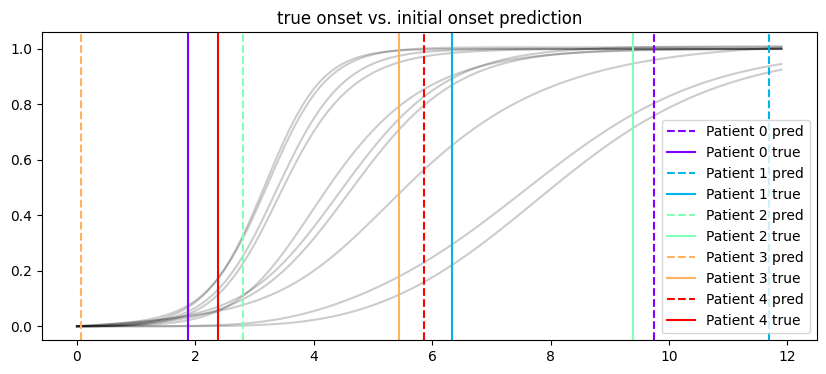

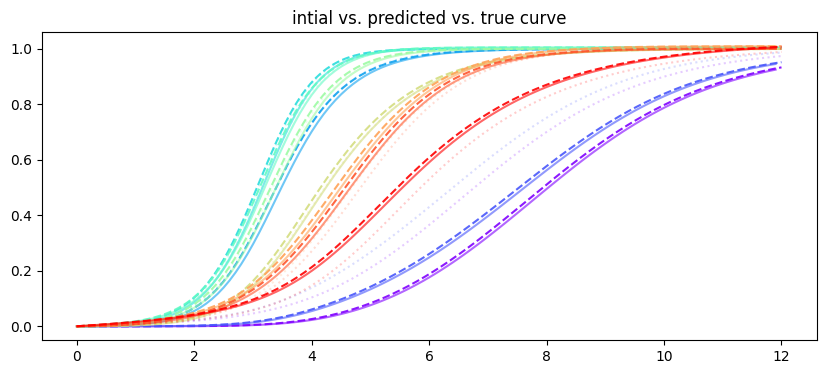

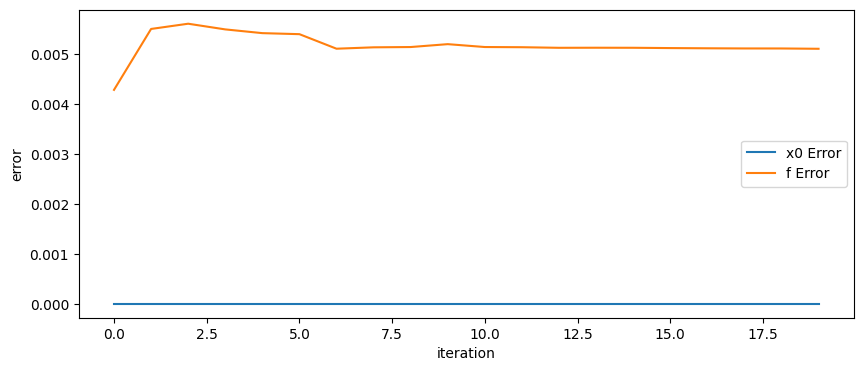

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


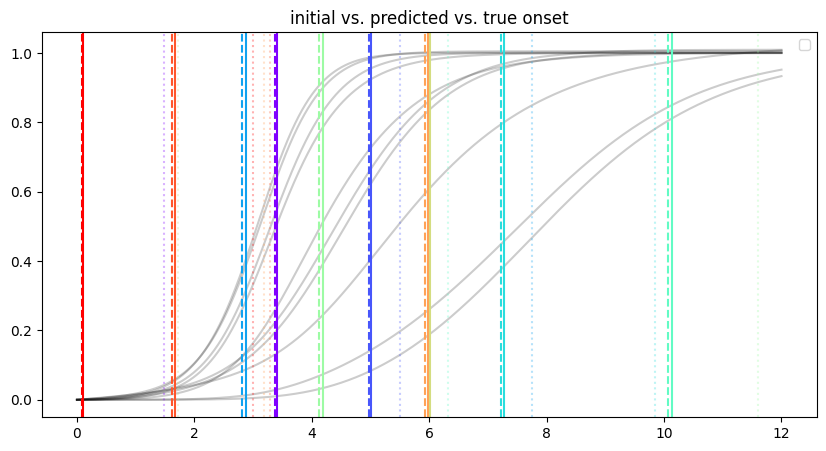

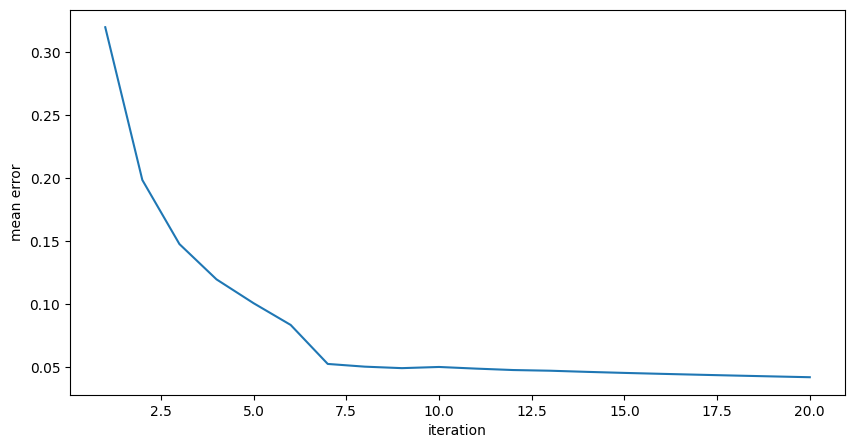

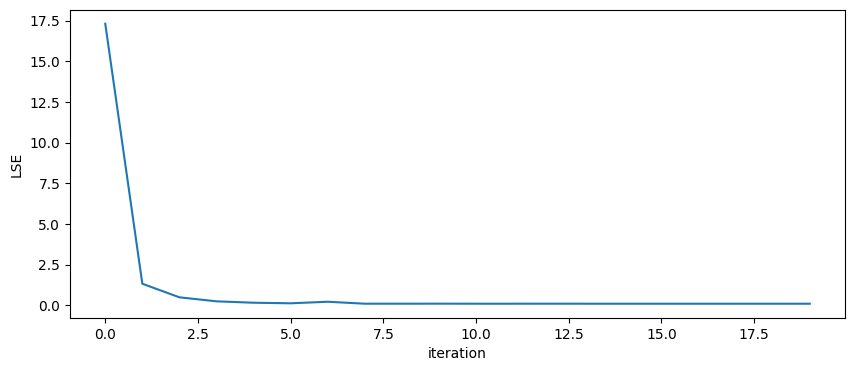

In [ ]:
# params
seed = 75
np.random.seed(seed)
random.seed(seed)

n_biomarkers = 10
t_max = 12
t_span = np.linspace(0, t_max, 2000)
noise_level = 0.0
n_patients = 200
n_patient_obs = 3

# fit and transform
t, x_true, K = generate_logistic_model(n_biomarkers=n_biomarkers, t_max=t_max, seed=seed)

df, beta_true_dict = generate_synthetic_data(
    n_biomarkers = n_biomarkers,
    t_max = t_max, 
    noise_level = noise_level,
    n_patients = n_patients,
    n_patient_obs = n_patient_obs,
    x_true=x_true, 
    t=t,
    seed=seed
)
plot_biomarker_trajectories(t, x_true, n_biomarkers=n_biomarkers)
plot_true_observations(df, t, x_true)

em_model_0 = EM(K=K,
              num_iterations=20,
              t_max=t_max,
              step=0.01,
              use_jacobian=True
              )

em_model_0.fit(df)

plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)

# Visualize final vs. initial theta fit
x0_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values[:n_biomarkers]
f_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values[n_biomarkers:]
x_final = solve_system(x0_final, f_final, K, t_span)

x0_init = em_model_0.theta_iter_["iter_0"].values[:n_biomarkers]
f_init = em_model_0.theta_iter_["iter_0"].values[n_biomarkers:]
x_init = solve_system(x0_init, f_init, K, t_span)

plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(em_model_0.theta_iter_, n_biomarkers, em_model_0.num_iterations)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_) 

## noise = 0.05

true x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true f: [0.         0.         0.         0.         0.0122567  0.
 0.         0.01076131 0.         0.01383921]


100%|██████████| 50/50 [02:51<00:00,  3.43s/it]


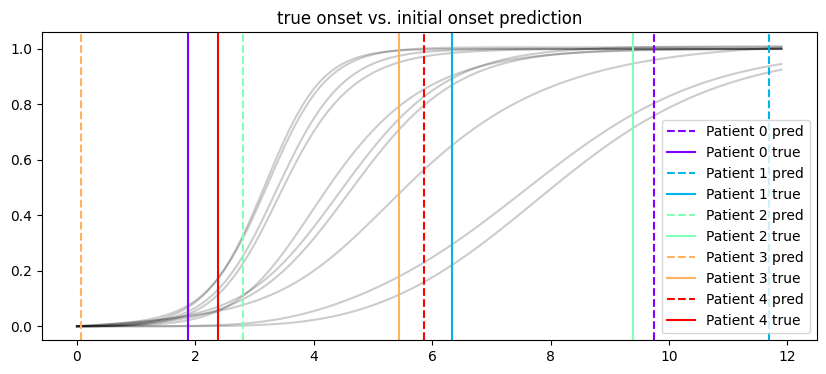

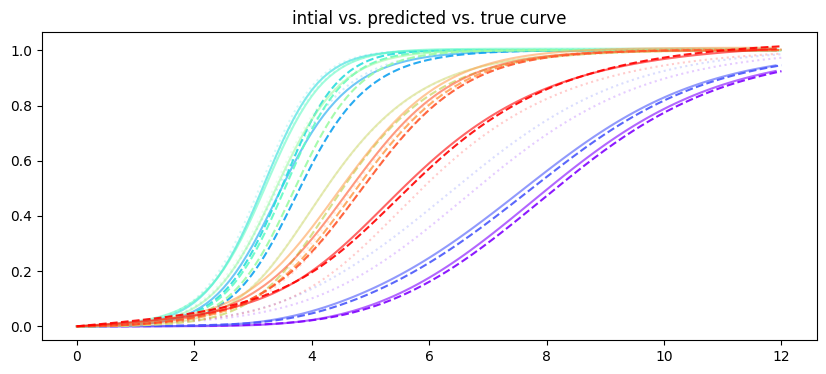

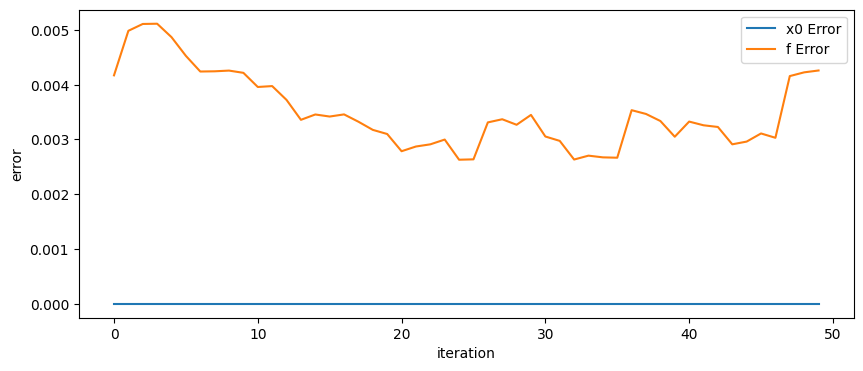

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


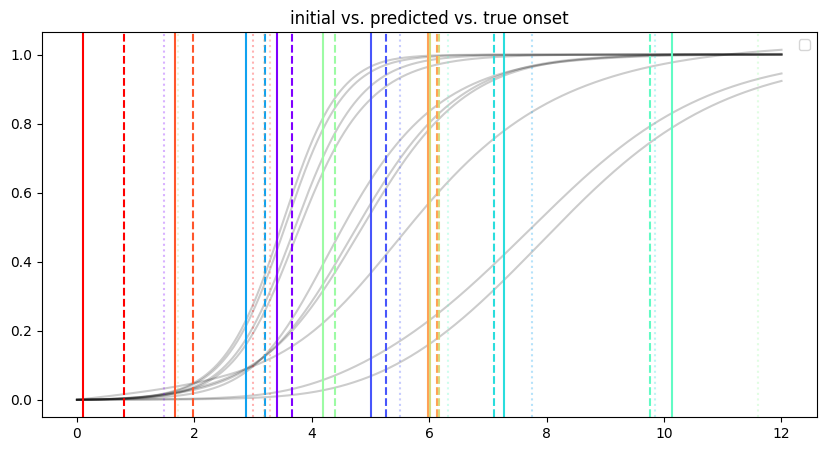

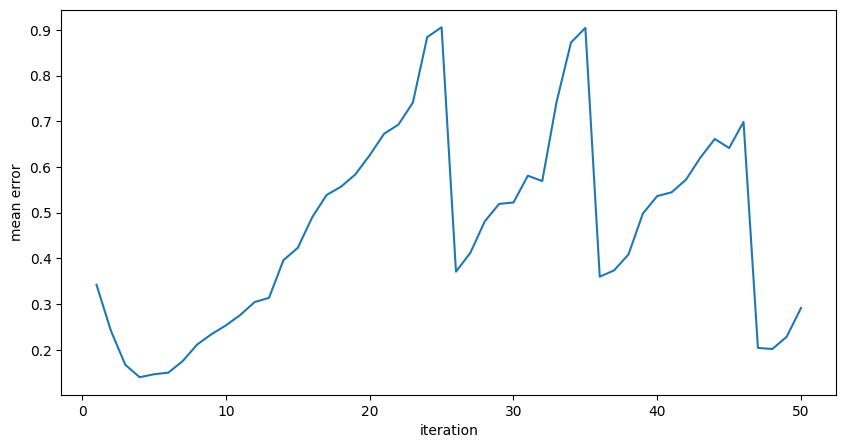

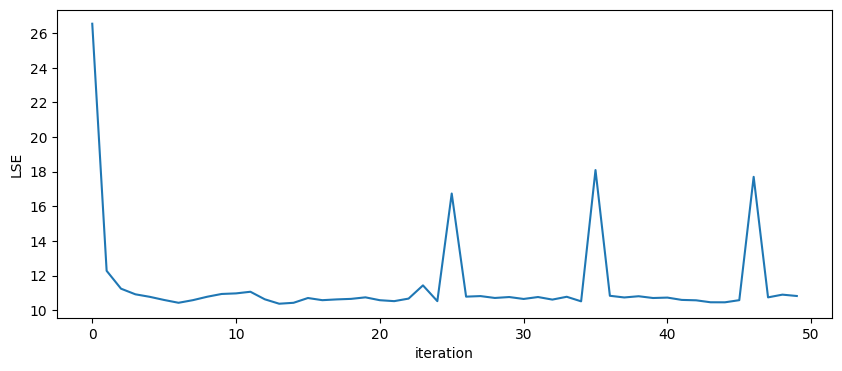

In [4]:

# params
n_biomarkers = 10
t_max = 12
t_span = np.linspace(0, t_max, 2000)
noise_level = 0.05
n_patients = 200
n_patient_obs = 3

# fit and transform
t, x_true, K = generate_logistic_model(n_biomarkers=n_biomarkers, t_max=t_max)

df, beta_true_dict = generate_synthetic_data(
    n_biomarkers = n_biomarkers,
    t_max = t_max, 
    noise_level = noise_level,
    n_patients = n_patients,
    n_patient_obs = n_patient_obs,
    x_true=x_true, 
    t=t
)

em_model_05 = EM(K=K,
              num_iterations=50,
              t_max=t_max,
              step=0.01,
              use_jacobian=True
              )

em_model_05.fit(df)

plot_initial_beta_guess(df, em_model_05.beta_iter_, t, x_true)

# Visualize final vs. initial theta fit
x0_final = em_model_05.theta_iter_[f"iter_{em_model_05.num_iterations - 1}"].values[:n_biomarkers]
f_final = em_model_05.theta_iter_[f"iter_{em_model_05.num_iterations - 1}"].values[n_biomarkers:]
x_final = solve_system(x0_final, f_final, K, t_span)

x0_init = em_model_05.theta_iter_["iter_0"].values[:n_biomarkers]
f_init = em_model_05.theta_iter_["iter_0"].values[n_biomarkers:]
x_init = solve_system(x0_init, f_init, K, t_span)

plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(em_model_05.theta_iter_, n_biomarkers, em_model_05.num_iterations)
plot_beta_overlay(df, em_model_05.beta_iter_, em_model_05.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_05.num_iterations - 1)
plot_beta_error_history(em_model_05.beta_iter_, df, em_model_05.num_iterations)
plot_lse(em_model_05.lse_array_) 

## noise = 0.1

true x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true f: [0.         0.         0.         0.         0.0122567  0.
 0.         0.01076131 0.         0.01383921]


100%|██████████| 50/50 [02:59<00:00,  3.59s/it]


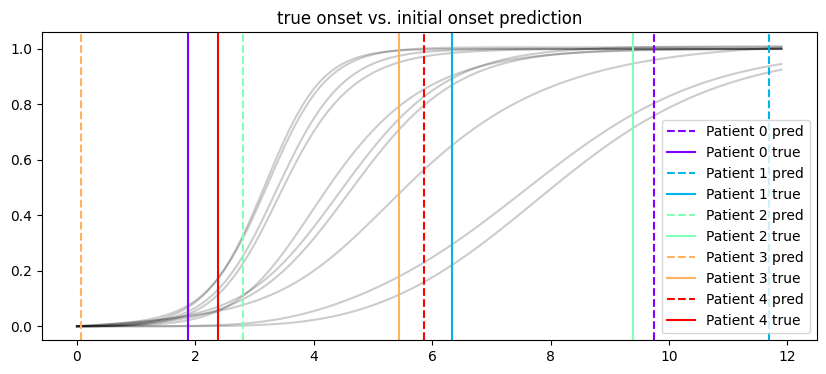

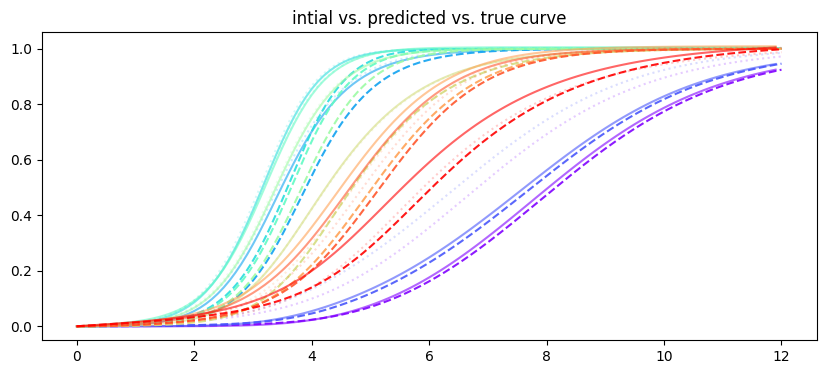

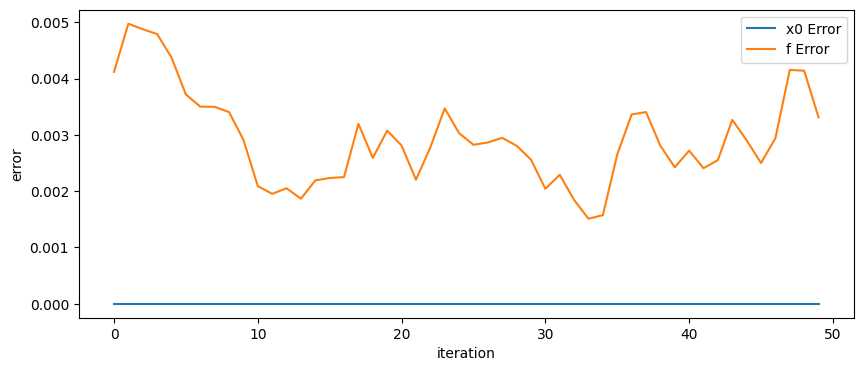

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


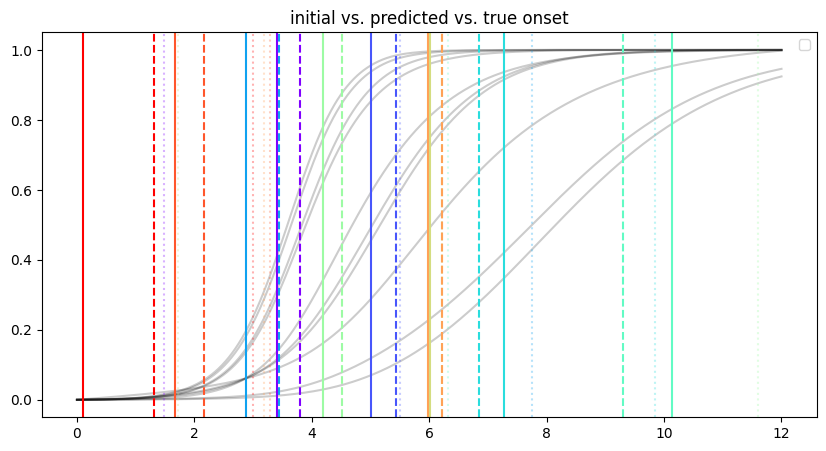

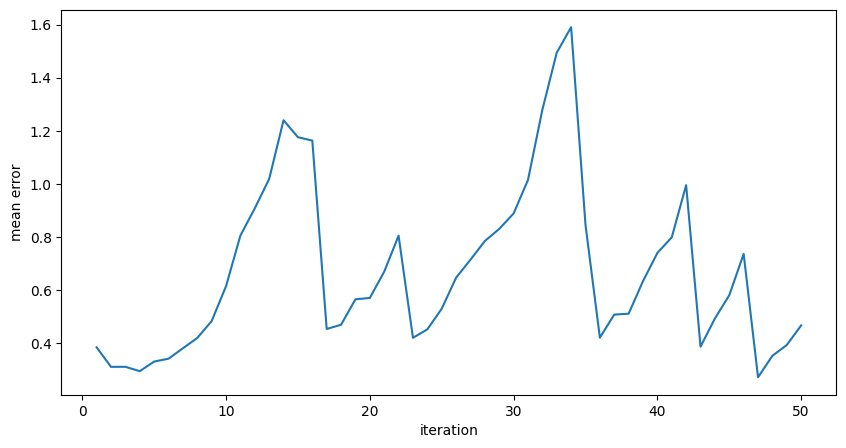

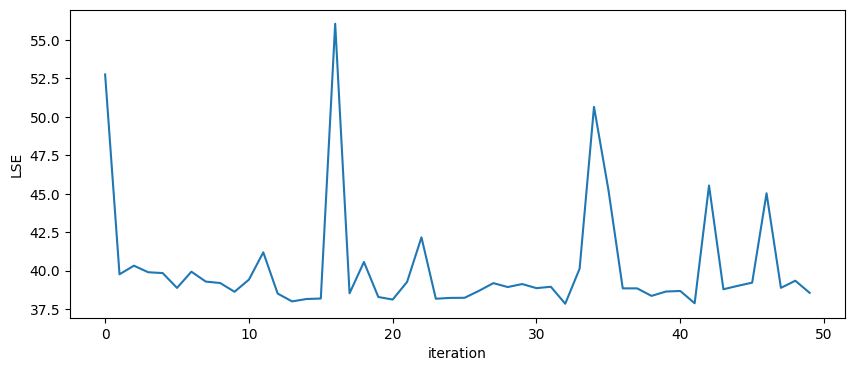

In [5]:

# params
n_biomarkers = 10
t_max = 12
t_span = np.linspace(0, t_max, 2000)
noise_level = 0.1
n_patients = 200
n_patient_obs = 3

# fit and transform
t, x_true, K = generate_logistic_model(n_biomarkers=n_biomarkers, t_max=t_max)

df, beta_true_dict = generate_synthetic_data(
    n_biomarkers = n_biomarkers,
    t_max = t_max, 
    noise_level = noise_level,
    n_patients = n_patients,
    n_patient_obs = n_patient_obs,
    x_true=x_true, 
    t=t
)

em_model_1 = EM(K=K,
              num_iterations=50,
              t_max=t_max,
              step=0.01,
              use_jacobian=True
              )

em_model_1.fit(df)

plot_initial_beta_guess(df, em_model_1.beta_iter_, t, x_true)

# Visualize final vs. initial theta fit
x0_final = em_model_1.theta_iter_[f"iter_{em_model_1.num_iterations - 1}"].values[:n_biomarkers]
f_final = em_model_1.theta_iter_[f"iter_{em_model_1.num_iterations - 1}"].values[n_biomarkers:]
x_final = solve_system(x0_final, f_final, K, t_span)

x0_init = em_model_1.theta_iter_["iter_0"].values[:n_biomarkers]
f_init = em_model_1.theta_iter_["iter_0"].values[n_biomarkers:]
x_init = solve_system(x0_init, f_init, K, t_span)

plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(em_model_1.theta_iter_, n_biomarkers, em_model_1.num_iterations)
plot_beta_overlay(df, em_model_1.beta_iter_, em_model_1.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_1.num_iterations - 1)
plot_beta_error_history(em_model_1.beta_iter_, df, em_model_1.num_iterations)
plot_lse(em_model_1.lse_array_) 

## noise = 0.2

true x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true f: [0.         0.         0.         0.         0.0122567  0.
 0.         0.01076131 0.         0.01383921]


100%|██████████| 50/50 [03:16<00:00,  3.92s/it]


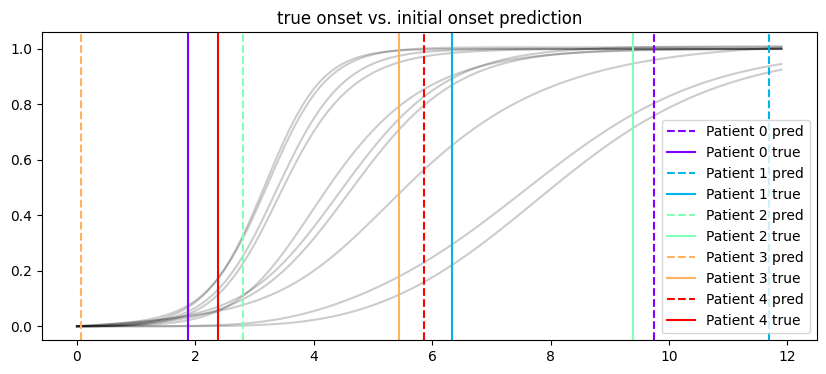

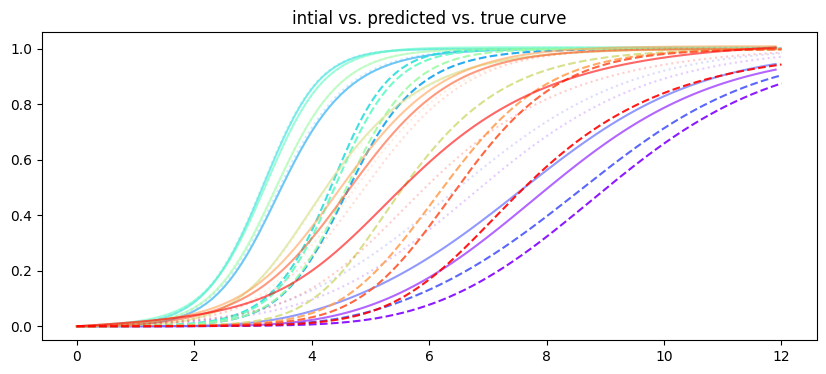

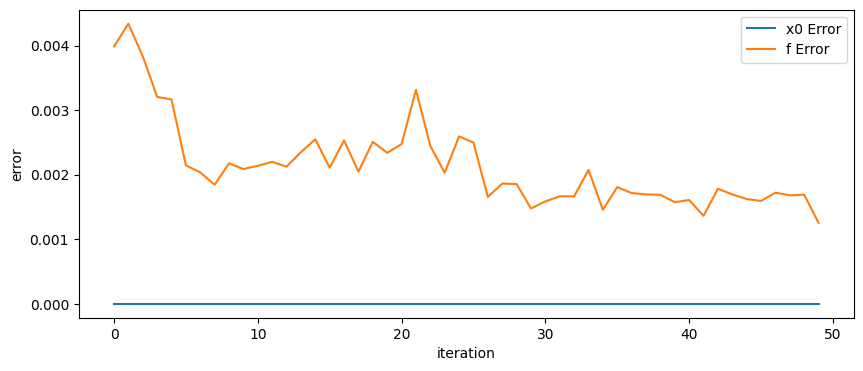

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


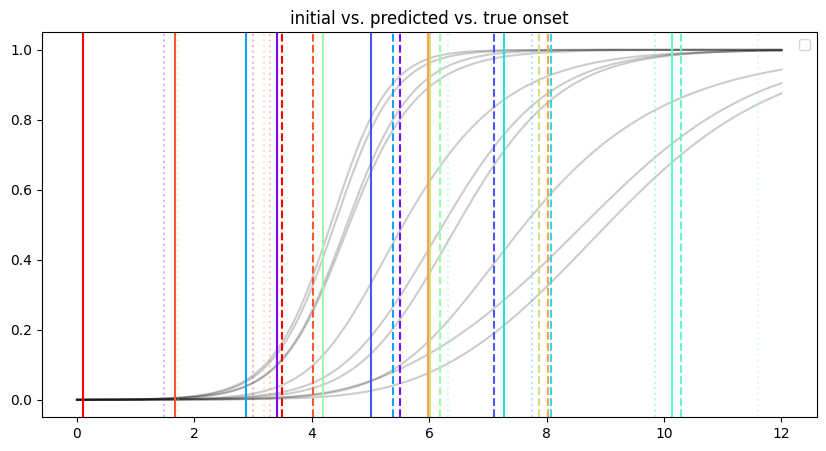

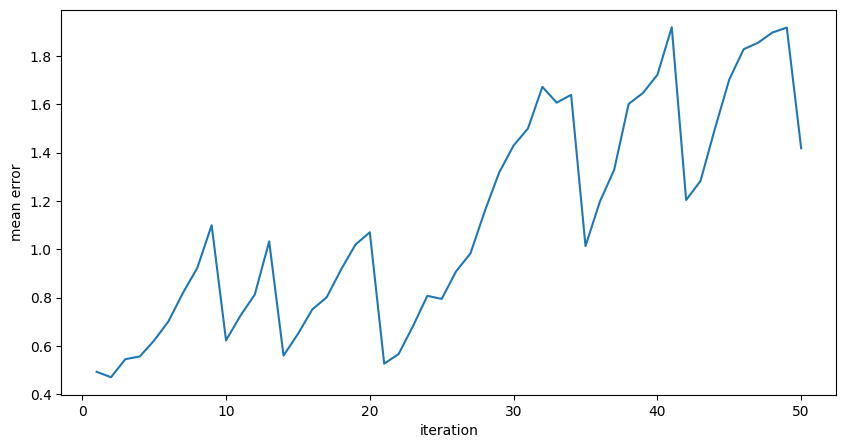

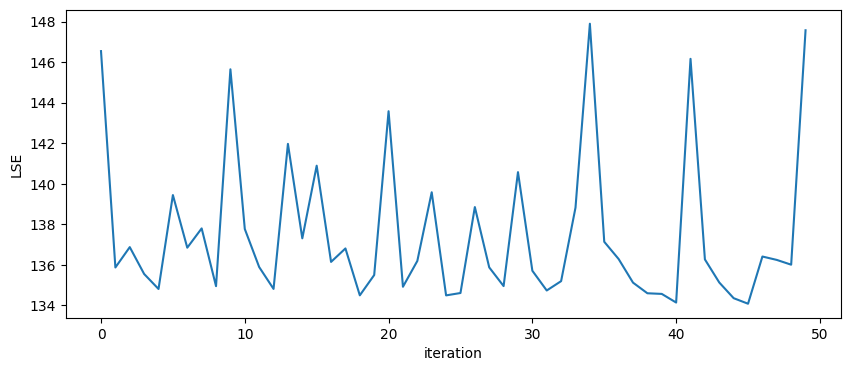

In [6]:
# params
n_biomarkers = 10
t_max = 12
t_span = np.linspace(0, t_max, 2000)
noise_level = 0.2
n_patients = 200
n_patient_obs = 3

# fit and transform
t, x_true, K = generate_logistic_model(n_biomarkers=n_biomarkers, t_max=t_max)

df, beta_true_dict = generate_synthetic_data(
    n_biomarkers = n_biomarkers,
    t_max = t_max, 
    noise_level = noise_level,
    n_patients = n_patients,
    n_patient_obs = n_patient_obs,
    x_true=x_true, 
    t=t
)

em_model_2 = EM(K=K,
              num_iterations=50,
              t_max=t_max,
              step=0.01,
              use_jacobian=True
              )

em_model_2.fit(df)

plot_initial_beta_guess(df, em_model_2.beta_iter_, t, x_true)

# Visualize final vs. initial theta fit
x0_final = em_model_2.theta_iter_[f"iter_{em_model_2.num_iterations - 1}"].values[:n_biomarkers]
f_final = em_model_2.theta_iter_[f"iter_{em_model_2.num_iterations - 1}"].values[n_biomarkers:]
x_final = solve_system(x0_final, f_final, K, t_span)

x0_init = em_model_2.theta_iter_["iter_0"].values[:n_biomarkers]
f_init = em_model_2.theta_iter_["iter_0"].values[n_biomarkers:]
x_init = solve_system(x0_init, f_init, K, t_span)

plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(em_model_2.theta_iter_, n_biomarkers, em_model_2.num_iterations)
plot_beta_overlay(df, em_model_2.beta_iter_, em_model_2.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_2.num_iterations - 1)
plot_beta_error_history(em_model_2.beta_iter_, df, em_model_2.num_iterations)
plot_lse(em_model_2.lse_array_) 

## noise = 0.3

true x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true f: [0.         0.         0.         0.         0.0122567  0.
 0.         0.01076131 0.         0.01383921]


100%|██████████| 50/50 [03:16<00:00,  3.93s/it]


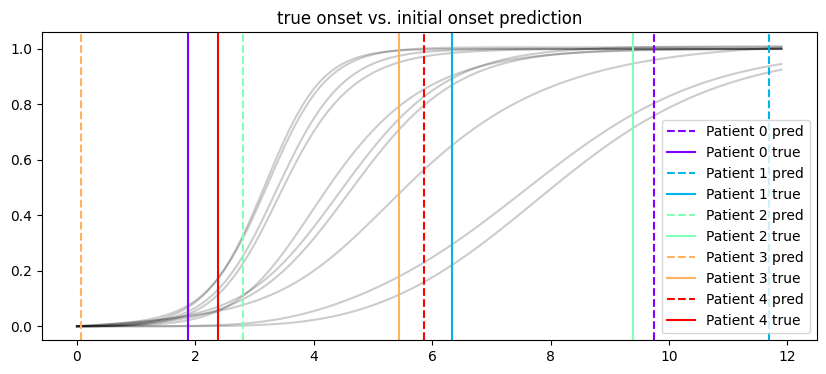

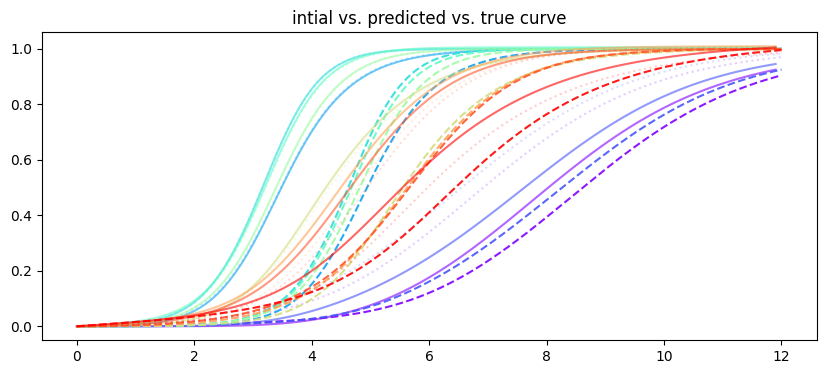

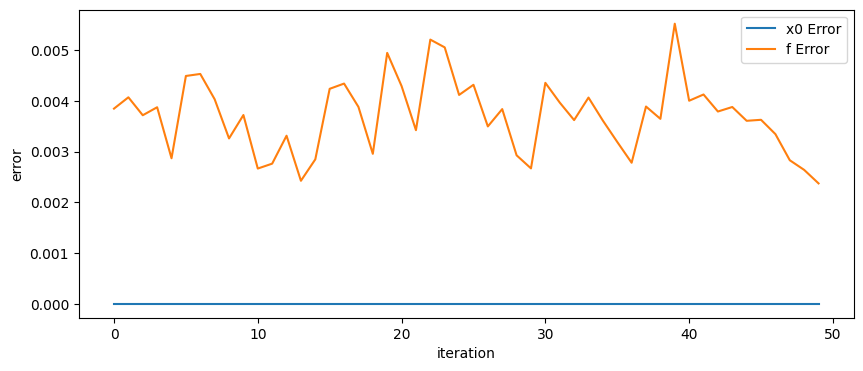

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


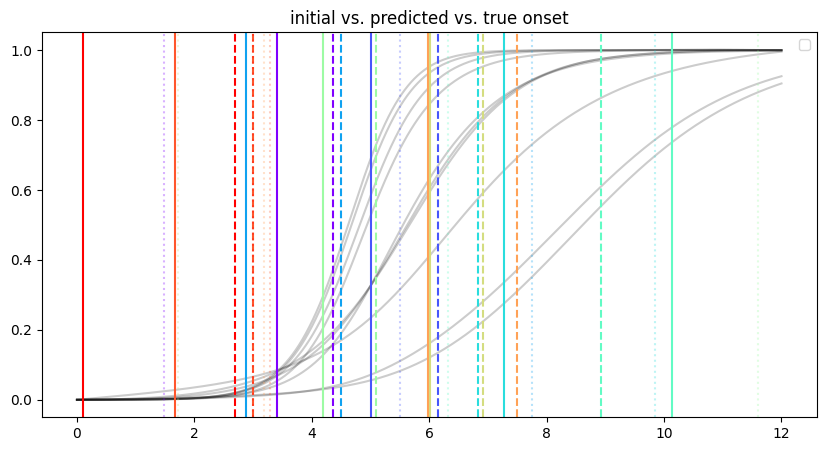

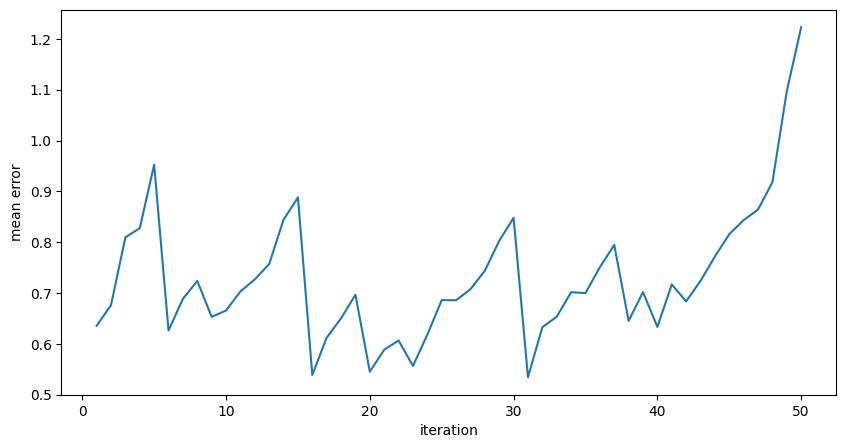

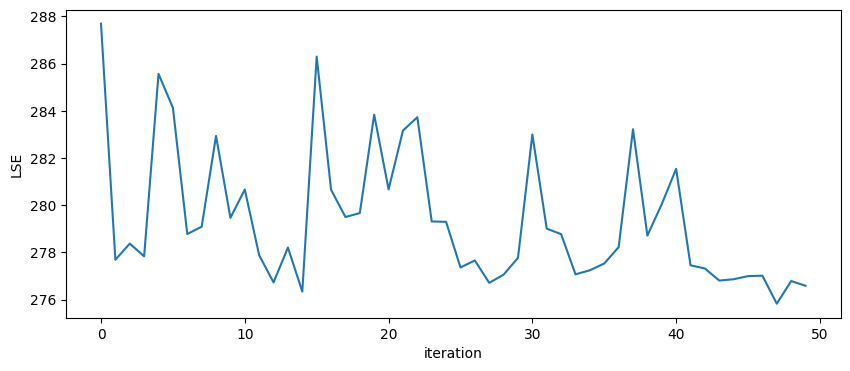

In [7]:
# params
n_biomarkers = 10
t_max = 12
t_span = np.linspace(0, t_max, 2000)
noise_level = 0.3
n_patients = 200
n_patient_obs = 3

# fit and transform
t, x_true, K = generate_logistic_model(n_biomarkers=n_biomarkers, t_max=t_max)

df, beta_true_dict = generate_synthetic_data(
    n_biomarkers = n_biomarkers,
    t_max = t_max, 
    noise_level = noise_level,
    n_patients = n_patients,
    n_patient_obs = n_patient_obs,
    x_true=x_true, 
    t=t
)

em_model_3 = EM(K=K,
              num_iterations=50,
              t_max=t_max,
              step=0.01,
              use_jacobian=True
              )

em_model_3.fit(df)

plot_initial_beta_guess(df, em_model_3.beta_iter_, t, x_true)

# Visualize final vs. initial theta fit
x0_final = em_model_3.theta_iter_[f"iter_{em_model_3.num_iterations - 1}"].values[:n_biomarkers]
f_final = em_model_3.theta_iter_[f"iter_{em_model_3.num_iterations - 1}"].values[n_biomarkers:]
x_final = solve_system(x0_final, f_final, K, t_span)

x0_init = em_model_3.theta_iter_["iter_0"].values[:n_biomarkers]
f_init = em_model_3.theta_iter_["iter_0"].values[n_biomarkers:]
x_init = solve_system(x0_init, f_init, K, t_span)

plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(em_model_3.theta_iter_, n_biomarkers, em_model_3.num_iterations)
plot_beta_overlay(df, em_model_3.beta_iter_, em_model_3.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_3.num_iterations - 1)
plot_beta_error_history(em_model_3.beta_iter_, df, em_model_3.num_iterations)
plot_lse(em_model_3.lse_array_) 